In [3]:
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook
import matplotlib.pyplot as plt
import matplotlib 
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight') 
%matplotlib inline
!pip install pycaret
from pycaret.regression import *


import plotly.express as px
import plotly.graph_objects as go
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import  confusion_matrix

  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached scipy-1.5.4-cp39-cp39-manylinux1_x86_64.whl (25.8 MB)
  Using cached kmodes-0.11.1-py2.py3-none-any.whl (19 kB)
  Using cached plotly-5.6.0-py2.py3-none-any.whl (27.7 MB)
  Using cached mlflow-1.24.0-py3-none-any.whl (16.5 MB)
  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached lightgbm-3.3.2-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached yellowbrick-1.4-py3-none-any.whl (274 kB)
  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached umap_learn-0.5.2-py3-none-any.whl
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python3.9 /tmp/pip-standalone-pip-ivq72gp4/__env_pip__.zip/pip i

In [4]:
#loading the csv file
dataset=pd.read_csv('./input/student_feedback.csv')

In [5]:
#value_count
dataset.value_counts()

Unnamed: 0  Student ID  Well versed with the subject  Explains concepts in an understandable way  Use of presentations  Degree of difficulty of assignments  Solves doubts willingly  Structuring of the course  Provides support for students going above and beyond  Course recommendation based on relevance
0           340         5                             2                                           7                     6                                    9                        2                          1                                                     8                                           1
672         140         7                             10                                          6                     8                                    6                        10                         9                                                     6                                           1
659         566         8                             10                      

In [6]:
#finding the shape of the dataset rows, cloumns
dataset.shape

(1001, 10)

In [7]:
#displaying the column names 
dataset.columns

Index(['Unnamed: 0', 'Student ID', 'Well versed with the subject',
       'Explains concepts in an understandable way', 'Use of presentations',
       'Degree of difficulty of assignments', 'Solves doubts willingly',
       'Structuring of the course',
       'Provides support for students going above and beyond',
       'Course recommendation based on relevance'],
      dtype='object')

In [8]:
#finding the unique values
dataset.nunique()

Unnamed: 0                                              1001
Student ID                                              1001
Well versed with the subject                               6
Explains concepts in an understandable way                 9
Use of presentations                                       5
Degree of difficulty of assignments                       10
Solves doubts willingly                                   10
Structuring of the course                                 10
Provides support for students going above and beyond      10
Course recommendation based on relevance                  10
dtype: int64

In [9]:
#statistics
dataset.describe()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,500.000000,7.497502,6.081918,5.942058,5.430569,5.474525,5.636364,5.662338,5.598402
std,289.108111,289.108111,1.692998,2.597168,1.415853,2.869046,2.874648,2.920212,2.891690,2.886617
min,0.000000,0.000000,5.000000,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.000000,250.000000,6.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,500.000000,500.000000,8.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000
75%,750.000000,750.000000,9.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1000.000000,1000.000000,10.000000,10.000000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
#cleaning the data
#to check whether null values are present
dataset.isnull().sum()

Unnamed: 0                                              0
Student ID                                              0
Well versed with the subject                            0
Explains concepts in an understandable way              0
Use of presentations                                    0
Degree of difficulty of assignments                     0
Solves doubts willingly                                 0
Structuring of the course                               0
Provides support for students going above and beyond    0
Course recommendation based on relevance                0
dtype: int64

In [11]:
#relationship analysis
#correlation analysis
cor = dataset.corr()
cor

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
Unnamed: 0,1.000000,-0.047897,-0.034524,-0.014716,0.018684,0.028489,0.020122,-0.032899,0.029320,-0.035824
Student ID,-0.047897,1.000000,0.028456,0.014302,0.003344,0.010314,0.008570,-0.048439,0.041793,-0.000564
Well versed with the subject,-0.034524,0.028456,1.000000,0.008916,-0.024674,-0.007087,-0.056981,-0.027490,0.031488,-0.015143
Explains concepts in an understandable way,-0.014716,0.014302,0.008916,1.000000,-0.012305,0.029484,-0.025839,0.012766,-0.003237,0.008528
Use of presentations,0.018684,0.003344,-0.024674,-0.012305,1.000000,0.020918,-0.036972,-0.020097,-0.014798,0.023173
Degree of difficulty of assignments,0.028489,0.010314,-0.007087,0.029484,0.020918,1.000000,0.009637,-0.053624,-0.002949,-0.005181
Solves doubts willingly,0.020122,0.008570,-0.056981,-0.025839,-0.036972,0.009637,1.000000,0.036062,0.006543,-0.000511
Structuring of the course,-0.032899,-0.048439,-0.027490,0.012766,-0.020097,-0.053624,0.036062,1.000000,-0.027819,-0.010224
Provides support for students going above and beyond,0.029320,0.041793,0.031488,-0.003237,-0.014798,-0.002949,0.006543,-0.027819,1.000000,-0.031117
Course recommendation based on relevance,-0.035824,-0.000564,-0.015143,0.008528,0.023173,-0.005181,-0.000511,-0.010224,-0.031117,1.000000


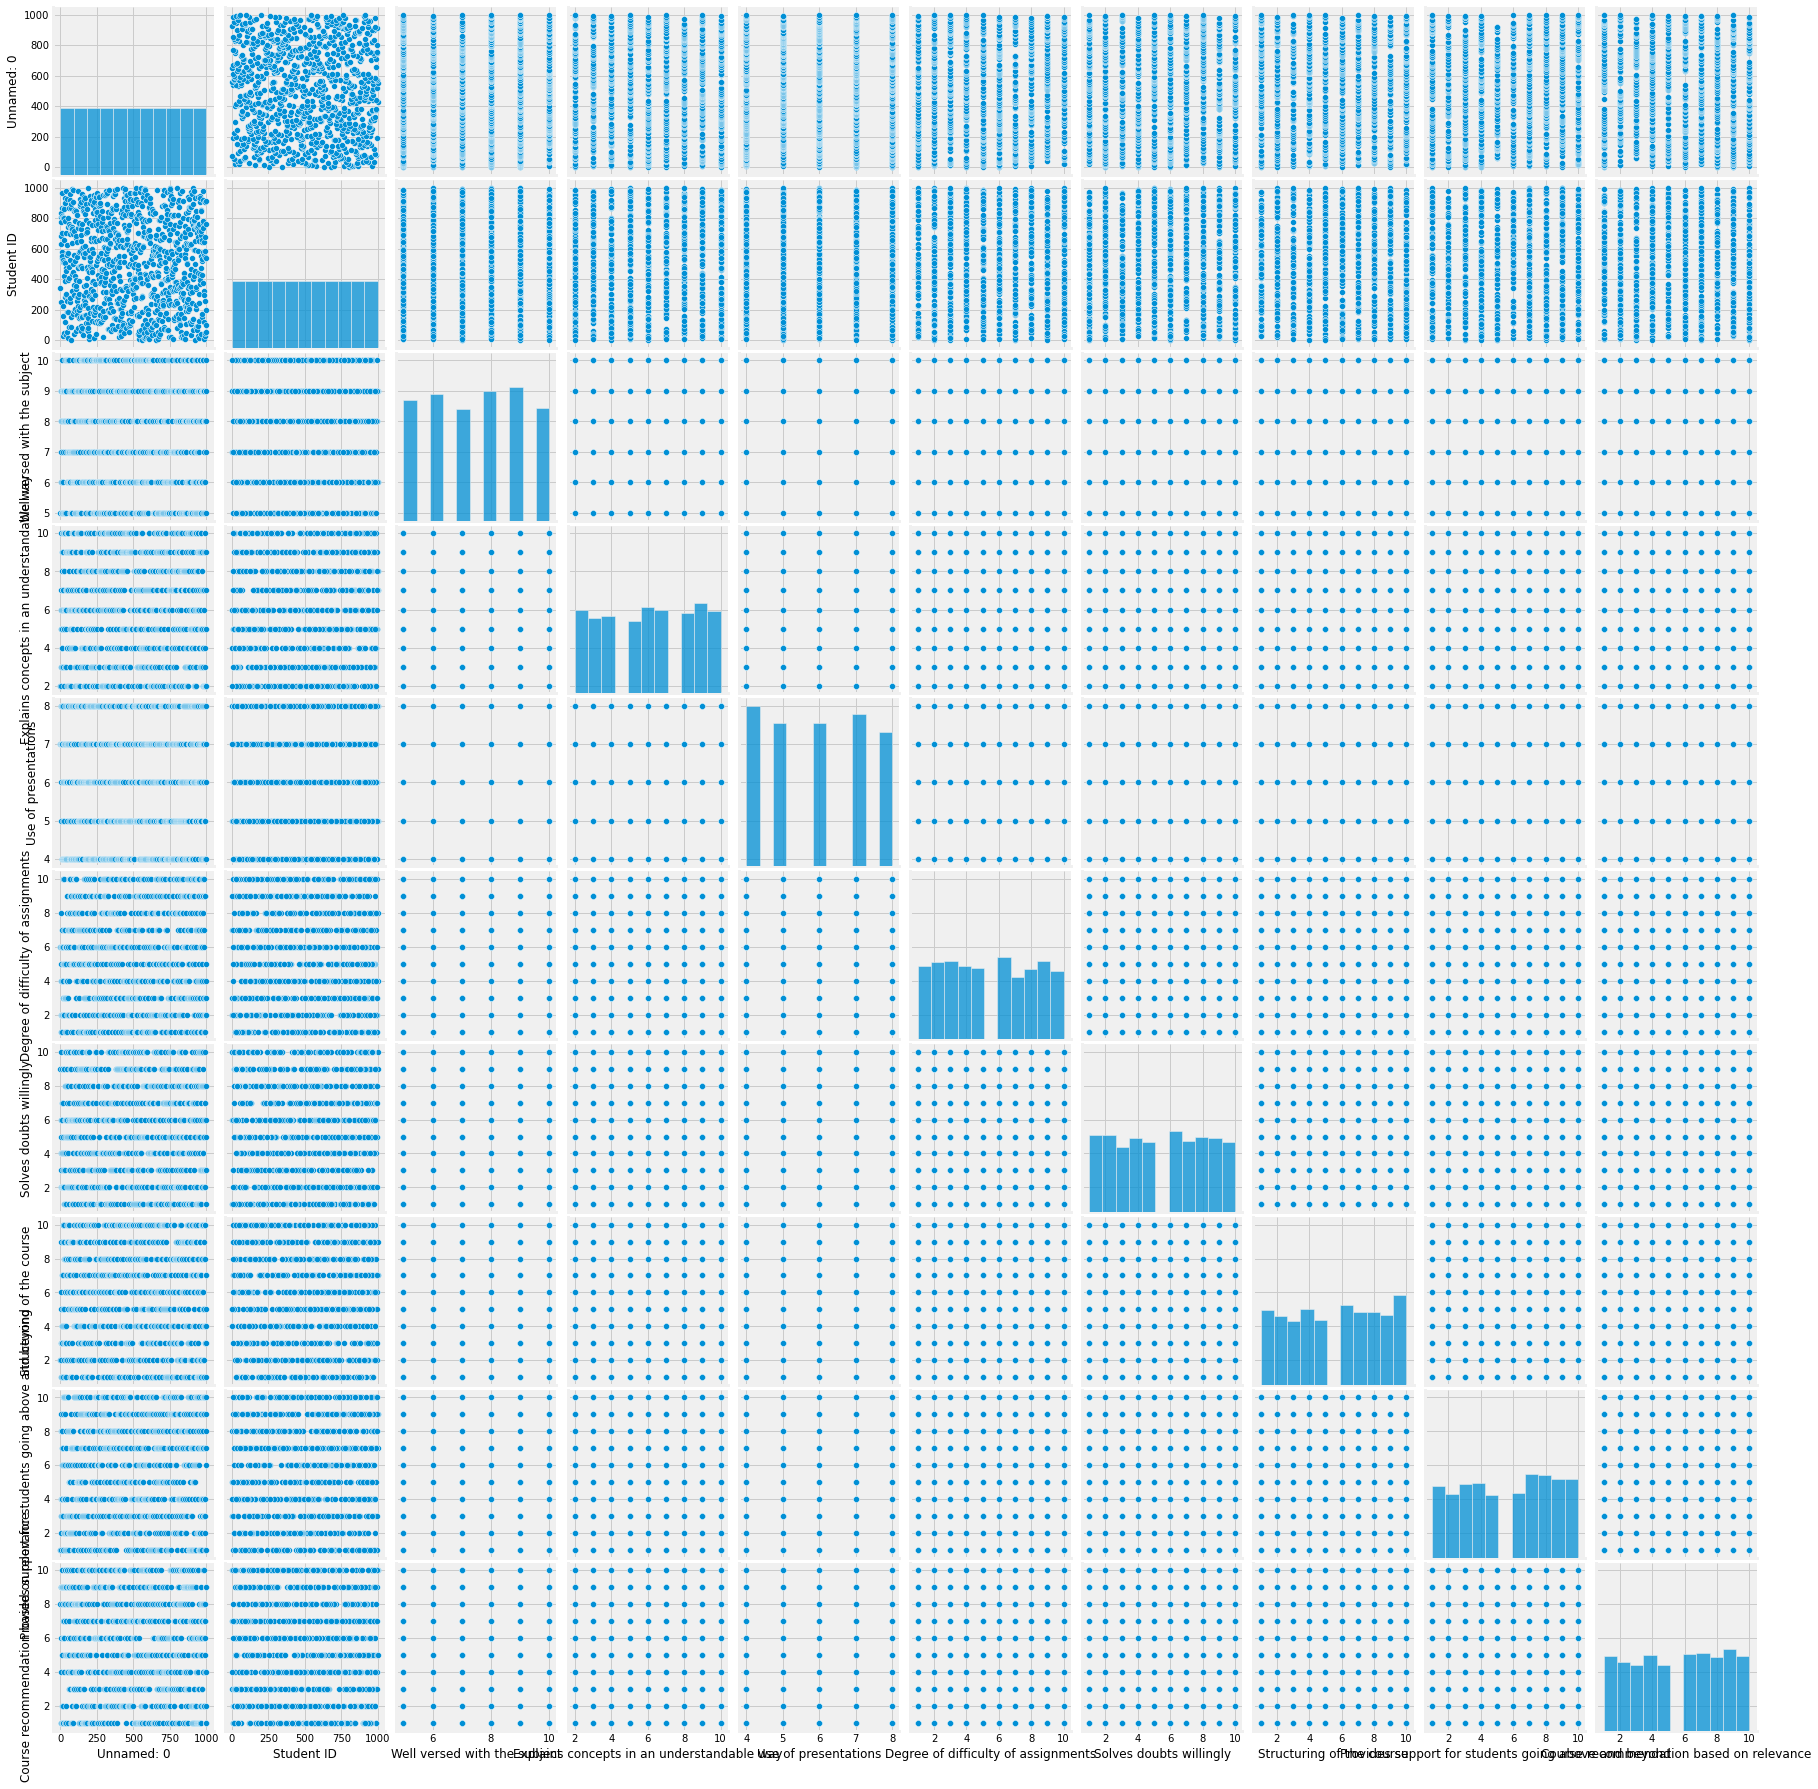

In [12]:
#visualization for seeing the correlation
sns.pairplot(dataset)

In [13]:
#Full dataset exploration
dataset.style.background_gradient(cmap="Blues")

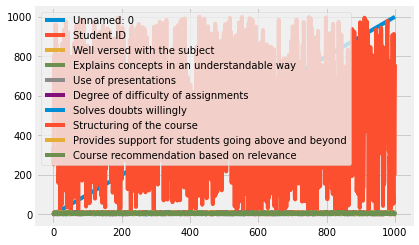

In [15]:
#Plotting
from matplotlib import pyplot
dataset.plot()
pyplot.show()

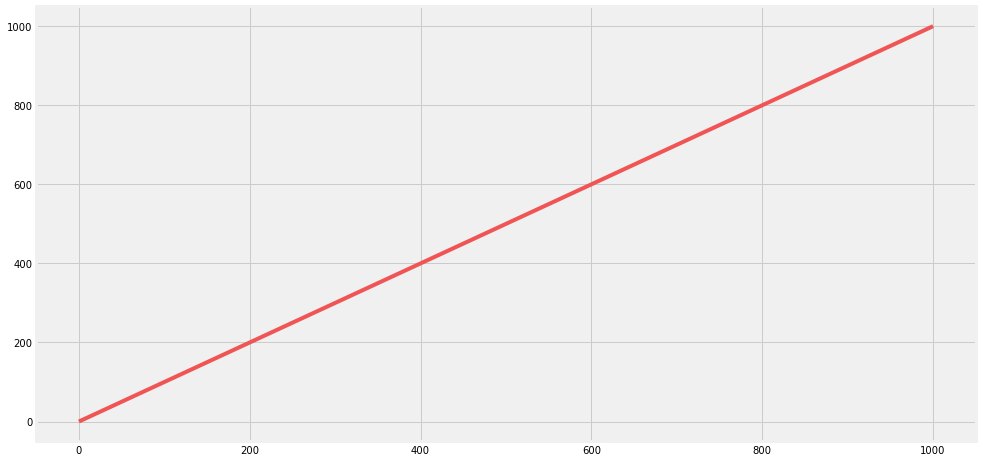

In [19]:
# Visualizing the Line Chart
plt.figure(figsize=[15,8])
plt.plot(dataset.index, data=dataset, color='#F05454') 

plt.show()

<AxesSubplot:xlabel='Degree of difficulty of assignments'>

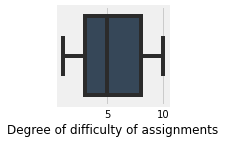

In [21]:
plt.subplot(2,3,5)
sns.boxplot(dataset['Degree of difficulty of assignments'], color='#30475E')

<AxesSubplot:xlabel='Course recommendation based on relevance'>

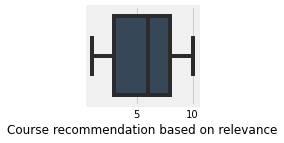

In [22]:
plt.subplot(2,3,5)
sns.boxplot(dataset['Course recommendation based on relevance'], color='#30475E')

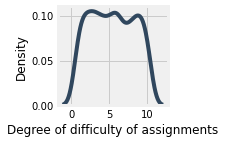

In [23]:
# KDEPlot
plt.subplot(2,3,6)
sns.kdeplot(x=dataset['Degree of difficulty of assignments'], color='#30475E')

plt.show()

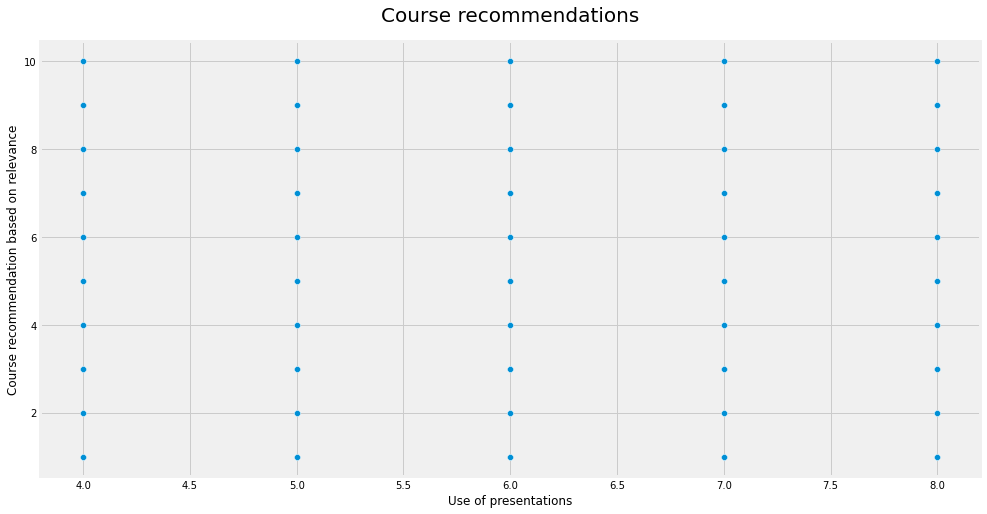

In [28]:
# Visualizing the ScatterPlot
plt.figure(figsize=[15,8])
# Profit in the Y axis, and Sales in the X. Hue will classify the dots according to Segment.
# The size of the dots are according to the volume.
sns.scatterplot(x=dataset['Use of presentations'], y=dataset['Course recommendation based on relevance'])
plt.title("Course recommendations", size=20, pad=20)
plt.show()

Text(0.5, 1.0, 'Composition of Category for Profit')

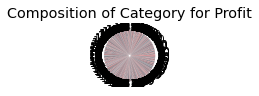

In [29]:
plt.subplot(3,2,3)
plt.pie(dataset['Course recommendation based on relevance'], labels=dataset['Structuring of the course'], colors=['#F05454','#30475E','#222831','#DDDDDD'])
plt.title("Distribution")

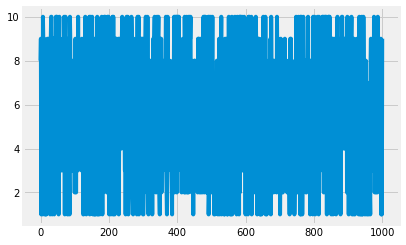

In [30]:
#Plotting
from matplotlib import pyplot
dataset['Course recommendation based on relevance'].plot()
pyplot.show()

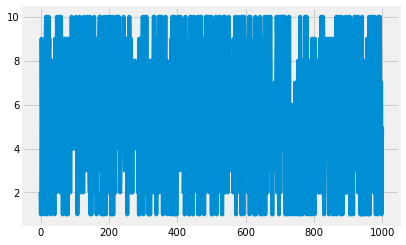

In [32]:
#Plotting
from matplotlib import pyplot
dataset['Structuring of the course'].plot()
pyplot.show()